In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%store -r durations_b1
%store -r durations_chb
%store -r durations_moabit
%store -r durations_oranienstr
%store -r durations_prinzenstr

duration_data = [durations_oranienstr, durations_moabit, durations_chb, durations_b1 , durations_prinzenstr ]
duration_data_subset = [durations_oranienstr, durations_b1]

In [8]:
defaults = []
defaults_ped = []
new_params = []
new_params_ped = []
simra = []

for arr in duration_data:
    defaults.append(arr[0])
    defaults_ped.append(arr[1])
    new_params.append(arr[2])
    new_params_ped.append(arr[3])
    simra.append(arr[4])


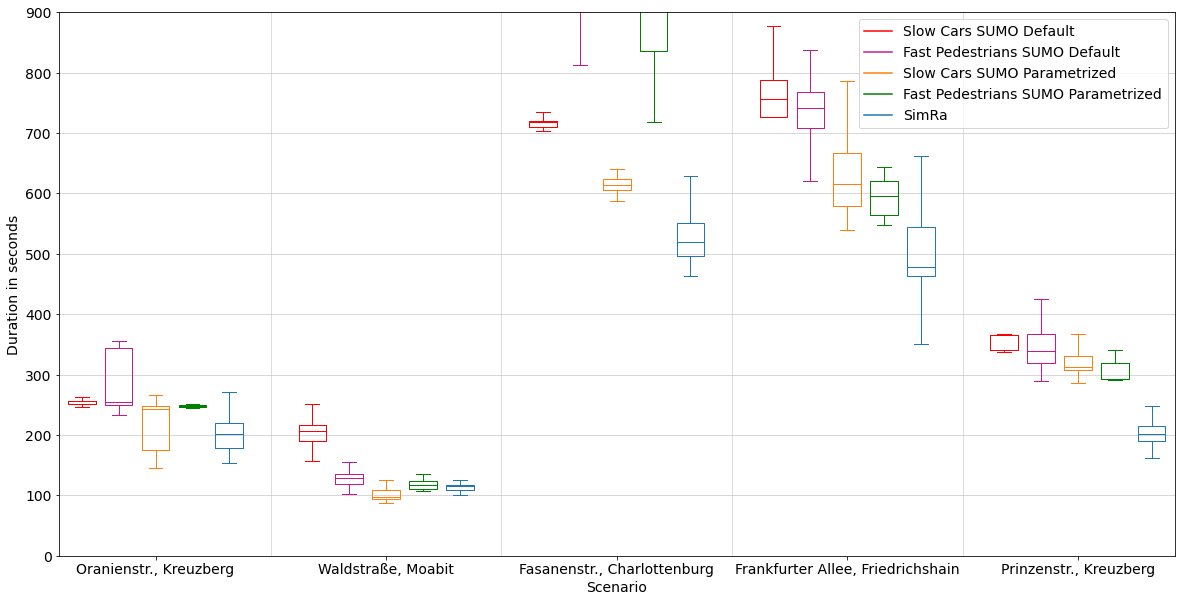

In [9]:
ticks = ['Oranienstr., Kreuzberg', 'Waldstraße, Moabit', 'Fasanenstr., Charlottenburg', 'Frankfurter Allee, Friedrichshain', 'Prinzenstr., Kreuzberg']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

fig = plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 14})
bpd = plt.boxplot(defaults, positions=np.array(range(len(defaults)))*5.0-1.6, widths=0.6, sym='')
bpdp = plt.boxplot(defaults_ped, positions=np.array(range(len(defaults)))*5.0-0.8, widths=0.6, sym='')
bpn = plt.boxplot(new_params, positions=np.array(range(len(new_params)))*5.0, widths=0.6, sym='')
bpnp = plt.boxplot(new_params_ped, positions=np.array(range(len(new_params)))*5.0 + 0.8, widths=0.6, sym='')
bps = plt.boxplot(simra, positions=np.array(range(len(simra)))*5.0+1.6, widths=0.6, sym='')

colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c']


set_box_color(bpd, 'r')
set_box_color(bpdp, '#c51b8a')
set_box_color(bpn, u'#ff7f0e')
set_box_color(bpnp, 'g')
set_box_color(bps, u'#1f77b4')

# draw temporary lines and use them to create a legend
plt.plot([], c='r', label='Slow Cars SUMO Default')
plt.plot([], c='#c51b8a', label='Fast Pedestrians SUMO Default')
plt.plot([], c=u'#ff7f0e', label='Slow Cars SUMO Parametrized')
plt.plot([], c='g', label='Fast Pedestrians SUMO Parametrized')
plt.plot([], c=u'#1f77b4', label='SimRa')
plt.legend(fontsize=14)
plt.grid(axis='y', linewidth=0.5)
plt.xlabel('Scenario')
plt.ylabel('Duration in seconds')

ax = fig.axes[0]
[ax.axvline(x,color= '#bdbdbd', linewidth=0.5, linestyle='-') for x in [2.5, 7.5, 12.5, 17.5]] 

plt.xticks(range(0, len(ticks) * 5, 5), ticks)
plt.ylim(0, 900)
plt.savefig('images/sim_complete.png', bbox_inches='tight')


In [14]:
# Neue Aufbereitung für Plot von Subset. Wurde in der Präsentation verwendet.

defaults = []
defaults_ped = []
new_params = []
new_params_ped = []
simra = []

for arr in duration_data_subset:
    defaults.append(arr[0])
    defaults_ped.append(arr[1])
    new_params.append(arr[2])
    new_params_ped.append(arr[3])
    simra.append(arr[4])
    
print(np.mean(new_params[1]))
print(np.mean(simra[1]))


631.3214285714286
524.1225461538461


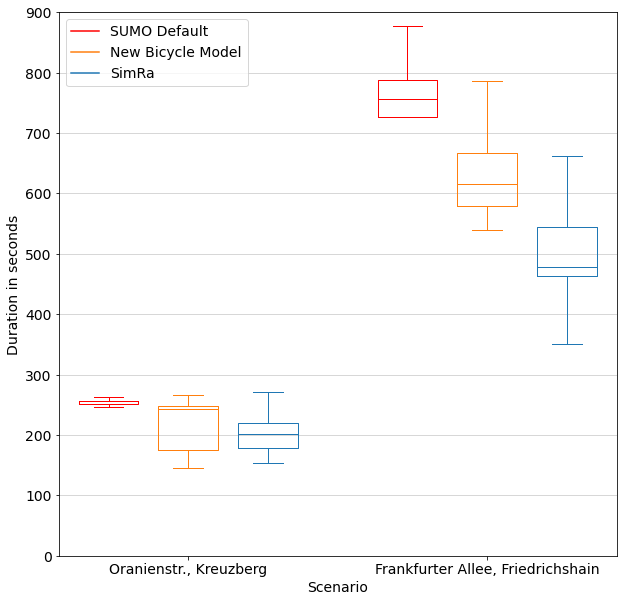

In [13]:
ticks = ['Oranienstr., Kreuzberg', 'Frankfurter Allee, Friedrichshain']
colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c']


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 14})
bpd = plt.boxplot(defaults, positions=np.array(range(len(defaults)))*3.0-0.8, widths=0.6, sym='')
bpn = plt.boxplot(new_params, positions=np.array(range(len(new_params)))*3.0, widths=0.6, sym='')
bps = plt.boxplot(simra, positions=np.array(range(len(simra)))*3.0+0.8, widths=0.6, sym='')

set_box_color(bpd, 'r')
set_box_color(bpn, colors[1])
set_box_color(bps, colors[0])

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='r', label='SUMO Default')
plt.plot([], c=colors[1], label='New Bicycle Model')
plt.plot([], c=colors[0], label='SimRa')
plt.legend(fontsize=14)
plt.grid(axis='y', linewidth=0.5)
plt.xlabel('Scenario')
plt.ylabel('Duration in seconds')
plt.xticks(range(0, len(ticks) * 3, 3), ticks)
plt.ylim(0, 900)
plt.savefig('images/sim_complete_subset.png', bbox_inches='tight')
